In [1]:
# imports
import rioxarray as rxr
import numpy as np

import xarray as xr
xr.set_options(use_bottleneck = False) # Just found out about this... I wonder if there are any impacts in code?
# https://github.com/pydata/xarray/issues/7336

import matplotlib.pyplot as plt

In [2]:
# dask cluster
from dask.distributed import LocalCluster
cluster = LocalCluster(n_workers = 10, threads_per_worker = 10, memory_limit = 0) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 100,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:65360,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 100
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:65425,Total threads: 10
Dashboard: http://127.0.0.1:65436/status,Memory: 0 B
Nanny: tcp://127.0.0.1:65365,


# HBL Data
- Get calculated stats from HBL_uncertaintyQuality

In [4]:
# data (start yearly uncertainty)

# start uncertainty 2018-2019
start_u_1819_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1819\start\HLS_Fmask_snow_start_u_winterYear1819_HBL.tif", masked = True, chunks = 'auto').squeeze()
#start_u_1819_hbl

# start uncertainty 2019-2020
start_u_1920_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1920\start\HLS_Fmask_snow_start_u_winterYear1920_HBL.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2020-2021
start_u_2021_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2021\start\HLS_Fmask_snow_start_u_winterYear2021_HBL.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2021-2022
start_u_2122_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2122\start\HLS_Fmask_snow_start_u_winterYear2122_HBL.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2022-2023
start_u_2223_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2223\start\HLS_Fmask_snow_start_u_winterYear2223_HBL.tif", masked = True, chunks = 'auto').squeeze()
start_u_2223_hbl

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437626315.0
    STATISTICS_COVARIANCES:  115.3391320133089
    STATISTICS_MAXIMUM:      83
    STATISTICS_MEAN:         13.73002256388
    STATISTICS_MEDIAN:       11.392157
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       10.739605766196
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_start_u

In [5]:
# data (end yearly uncertainty)

# end uncertainty 2018-2019
end_u_1819_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1819\end\HLS_Fmask_snow_end_u_winterYear1819_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2019-2020
end_u_1920_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\1920\end\HLS_Fmask_snow_end_u_winterYear1920_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2020-2021
end_u_2021_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2021\end\HLS_Fmask_snow_end_u_winterYear2021_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2021-2022
end_u_2122_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2122\end\HLS_Fmask_snow_end_u_winterYear2122_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2022-2023
end_u_2223_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2223\end\HLS_Fmask_snow_end_u_winterYear2223_HBL.tif", masked = True, chunks = 'auto').squeeze()
end_u_2223_hbl

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437626315.0
    STATISTICS_COVARIANCES:  13.20896979224757
    STATISTICS_MAXIMUM:      47
    STATISTICS_MEAN:         4.1228623466109
    STATISTICS_MEDIAN:       2.94902
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       3.6344146423114
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_u

In [6]:
# data (metric weighted mean uncertainty 2018-2023)

# start
start_wmu_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\start\weighted_mean\HLS_Fmask_snow_start_u_mn_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()

# end
end_wmu_hbl = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\end\weighted_mean\HLS_Fmask_snow_end_u_mn_1823_HBL.tif", masked = True, chunks = 'auto').squeeze()
end_wmu_hbl

# length 
# may not technically be equal to start + end here (because of weighting), but won't be on same scale as start and end...

<xarray.DataArray (y: 32000, x: 46000)> Size: 6GB
dask.array<getitem, shape=(32000, 46000), dtype=float32, chunksize=(729, 46000), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437628181.0
    STATISTICS_COVARIANCES:  3.654510164953163
    STATISTICS_MAXIMUM:      35.032154083252
    STATISTICS_MEAN:         4.6682307722337
    STATISTICS_MEDIAN:       4.396192
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1.9116773171624
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_u_mn

# NA Data
- Get stats from Alaska_unceraintyQuality

In [8]:
# data (start yearly uncertainty)

# start uncertainty 2018-2019
start_u_1819_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1819\HLS_Fmask_snow_start_u_winterYear1819_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
#start_u_1819

# start uncertainty 2019-2020
start_u_1920_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1920\HLS_Fmask_snow_start_u_winterYear1920_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2020-2021
start_u_2021_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2021\HLS_Fmask_snow_start_u_winterYear2021_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2021-2022
start_u_2122_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2122\HLS_Fmask_snow_start_u_winterYear2122_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# start uncertainty 2022-2023
start_u_2223_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2223\HLS_Fmask_snow_start_u_winterYear2223_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
start_u_2223_na

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        3851316.0
    STATISTICS_COVARIANCES:  99.85482082760639
    STATISTICS_MAXIMUM:      108
    STATISTICS_MEAN:         4.4212140733195
    STATISTICS_MEDIAN:       1.694118
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       9.9927384048421
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_start_u

In [9]:
# data (end yearly uncertainty)

# end uncertainty 2018-2019
end_u_1819_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1819\HLS_Fmask_snow_end_u_winterYear1819_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2019-2020
end_u_1920_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\1920\HLS_Fmask_snow_end_u_winterYear1920_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2020-2021
end_u_2021_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2021\HLS_Fmask_snow_end_u_winterYear2021_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2021-2022
end_u_2122_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2122\HLS_Fmask_snow_end_u_winterYear2122_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end uncertainty 2022-2023
end_u_2223_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\winterYear\2223\HLS_Fmask_snow_end_u_winterYear2223_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
end_u_2223_na

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_SOFTWARE:        GDAL 3.7.0e (3070046) (4.5.1;1700;3.0.0;2.0.7;;;...
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  9.90727731508813
    STATISTICS_MAXIMUM:      35
    STATISTICS_MEAN:         3.7994063587616
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       3.1475827733498
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_u

In [10]:
# data (metric weighted mean uncertainty 2018-2023)

# start
start_wmu_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_start_u_mn_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()

# end
end_wmu_na = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Alaska Snow Depth\3 HLS snowDynamics\is_7\interannual\HLS_Fmask_snow_end_u_mn_1823_AlaskaSite.tif", masked = True, chunks = 'auto').squeeze()
end_wmu_na

# length 
# may not technically be equal to start + end here (because of weighting), but won't be on same scale as start and end...

<xarray.DataArray (y: 2436, x: 1581)> Size: 15MB
dask.array<getitem, shape=(2436, 1581), dtype=float32, chunksize=(145, 1581), chunktype=numpy.ndarray>
Coordinates:
    band         int64 8B 1
  * x            (x) float64 13kB 3.995e+05 3.996e+05 ... 4.469e+05 4.469e+05
  * y            (y) float64 19kB 7.679e+06 7.679e+06 ... 7.606e+06 7.606e+06
    spatial_ref  int64 8B 0
Attributes:
    TIFFTAG_SOFTWARE:        GDAL 3.7.0e (3070046) (4.5.1;1700;3.0.0;2.0.7;;;...
    AREA_OR_POINT:           Area
    STATISTICS_COVARIANCES:  1.978264843471799
    STATISTICS_MAXIMUM:      25.211536407471
    STATISTICS_MEAN:         3.3132017985599
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       1.4065080317836
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_end_u_mn

# Boxplots

## HBL arrays and %Good

In [11]:
# Start: Create appended arrays
start_u_ar_hbl = []

start_u_1819_hbl = start_u_1819_hbl.compute().to_numpy().flatten()
start_u_1819_hbl = start_u_1819_hbl[~np.isnan(start_u_1819_hbl)]
start_u_ar_hbl.append(start_u_1819_hbl)

start_u_1920_hbl = start_u_1920_hbl.compute().to_numpy().flatten()
start_u_1920_hbl = start_u_1920_hbl[~np.isnan(start_u_1920_hbl)]
start_u_ar_hbl.append(start_u_1920_hbl)

start_u_2021_hbl = start_u_2021_hbl.compute().to_numpy().flatten()
start_u_2021_hbl = start_u_2021_hbl[~np.isnan(start_u_2021_hbl)]
start_u_ar_hbl.append(start_u_2021_hbl)

start_u_2122_hbl = start_u_2122_hbl.compute().to_numpy().flatten()
start_u_2122_hbl = start_u_2122_hbl[~np.isnan(start_u_2122_hbl)]
start_u_ar_hbl.append(start_u_2122_hbl)

start_u_2223_hbl = start_u_2223_hbl.compute().to_numpy().flatten()
start_u_2223_hbl = start_u_2223_hbl[~np.isnan(start_u_2223_hbl)]
start_u_ar_hbl.append(start_u_2223_hbl)

start_wmu_hbl = start_wmu_hbl.compute().to_numpy().flatten()
start_wmu_hbl = start_wmu_hbl[~np.isnan(start_wmu_hbl)]
start_u_ar_hbl.append(start_wmu_hbl)

In [12]:
# Get % Good
start_good_hbl = []

start_good_hbl.append(str(round(np.sum(start_u_1819_hbl <= 7.5) / len(start_u_1819_hbl) * 100)) + '%')
start_good_hbl.append(str(round(np.sum(start_u_1920_hbl <= 7.5) / len(start_u_1920_hbl) * 100)) + '%')
start_good_hbl.append(str(round(np.sum(start_u_2021_hbl <= 7.5) / len(start_u_2021_hbl) * 100)) + '%')
start_good_hbl.append(str(round(np.sum(start_u_2122_hbl <= 7.5) / len(start_u_2122_hbl) * 100)) + '%')
start_good_hbl.append(str(round(np.sum(start_u_2223_hbl <= 7.5) / len(start_u_2223_hbl) * 100)) + '%')
start_good_hbl.append(str(round(np.sum(start_wmu_hbl <= 7.5) / len(start_wmu_hbl) * 100)) + '%')
start_good_hbl

['22%', '21%', '28%', '23%', '37%', '5%']

In [13]:
# End: Create appended arrays
end_u_ar_hbl = []

end_u_1819_hbl = end_u_1819_hbl.compute().to_numpy().flatten()
end_u_1819_hbl = end_u_1819_hbl[~np.isnan(end_u_1819_hbl)]
end_u_ar_hbl.append(end_u_1819_hbl)

end_u_1920_hbl = end_u_1920_hbl.compute().to_numpy().flatten()
end_u_1920_hbl = end_u_1920_hbl[~np.isnan(end_u_1920_hbl)]
end_u_ar_hbl.append(end_u_1920_hbl)

end_u_2021_hbl = end_u_2021_hbl.compute().to_numpy().flatten()
end_u_2021_hbl = end_u_2021_hbl[~np.isnan(end_u_2021_hbl)]
end_u_ar_hbl.append(end_u_2021_hbl)

end_u_2122_hbl = end_u_2122_hbl.compute().to_numpy().flatten()
end_u_2122_hbl = end_u_2122_hbl[~np.isnan(end_u_2122_hbl)]
end_u_ar_hbl.append(end_u_2122_hbl)

end_u_2223_hbl = end_u_2223_hbl.compute().to_numpy().flatten()
end_u_2223_hbl = end_u_2223_hbl[~np.isnan(end_u_2223_hbl)]
end_u_ar_hbl.append(end_u_2223_hbl)

end_wmu_hbl = end_wmu_hbl.compute().to_numpy().flatten()
end_wmu_hbl = end_wmu_hbl[~np.isnan(end_wmu_hbl)]
end_u_ar_hbl.append(end_wmu_hbl)

In [14]:
# Get % Good
end_good_hbl = []

end_good_hbl.append(str(round(np.sum(end_u_1819_hbl <= 7.5) / len(end_u_1819_hbl) * 100)) + '%')
end_good_hbl.append(str(round(np.sum(end_u_1920_hbl <= 7.5) / len(end_u_1920_hbl) * 100)) + '%')
end_good_hbl.append(str(round(np.sum(end_u_2021_hbl <= 7.5) / len(end_u_2021_hbl) * 100)) + '%')
end_good_hbl.append(str(round(np.sum(end_u_2122_hbl <= 7.5) / len(end_u_2122_hbl) * 100)) + '%')
end_good_hbl.append(str(round(np.sum(end_u_2223_hbl <= 7.5) / len(end_u_2223_hbl) * 100)) + '%')
end_good_hbl.append(str(round(np.sum(end_wmu_hbl <= 7.5) / len(end_wmu_hbl) * 100)) + '%')
end_good_hbl

['81%', '74%', '68%', '94%', '84%', '92%']

## NA arrays and %Good

In [15]:
# Start: Create appended arrays
start_u_ar_na = []

start_u_1819_na = start_u_1819_na.compute().to_numpy().flatten()
start_u_1819_na = start_u_1819_na[~np.isnan(start_u_1819_na)]
start_u_ar_na.append(start_u_1819_na)

start_u_1920_na = start_u_1920_na.compute().to_numpy().flatten()
start_u_1920_na = start_u_1920_na[~np.isnan(start_u_1920_na)]
start_u_ar_na.append(start_u_1920_na)

start_u_2021_na = start_u_2021_na.compute().to_numpy().flatten()
start_u_2021_na = start_u_2021_na[~np.isnan(start_u_2021_na)]
start_u_ar_na.append(start_u_2021_na)

start_u_2122_na = start_u_2122_na.compute().to_numpy().flatten()
start_u_2122_na = start_u_2122_na[~np.isnan(start_u_2122_na)]
start_u_ar_na.append(start_u_2122_na)

start_u_2223_na = start_u_2223_na.compute().to_numpy().flatten()
start_u_2223_na = start_u_2223_na[~np.isnan(start_u_2223_na)]
start_u_ar_na.append(start_u_2223_na)

start_wmu_na = start_wmu_na.compute().to_numpy().flatten()
start_wmu_na = start_wmu_na[~np.isnan(start_wmu_na)]
start_u_ar_na.append(start_wmu_na)

In [16]:
# Get % Good
start_good_na = []

start_good_na.append(str(round(np.sum(start_u_1819_na <= 7.5) / len(start_u_1819_na) * 100)) + '%')
start_good_na.append(str(round(np.sum(start_u_1920_na <= 7.5) / len(start_u_1920_na) * 100)) + '%')
start_good_na.append(str(round(np.sum(start_u_2021_na <= 7.5) / len(start_u_2021_na) * 100)) + '%')
start_good_na.append(str(round(np.sum(start_u_2122_na <= 7.5) / len(start_u_2122_na) * 100)) + '%')
start_good_na.append(str(round(np.sum(start_u_2223_na <= 7.5) / len(start_u_2223_na) * 100)) + '%')
start_good_na.append(str(round(np.sum(start_wmu_na <= 7.5) / len(start_wmu_na) * 100)) + '%')
start_good_na

['38%', '94%', '84%', '97%', '94%', '39%']

In [17]:
# End: Create appended arrays
end_u_ar_na = []

end_u_1819_na = end_u_1819_na.compute().to_numpy().flatten()
end_u_1819_na = end_u_1819_na[~np.isnan(end_u_1819_na)]
end_u_ar_na.append(end_u_1819_na)

end_u_1920_na = end_u_1920_na.compute().to_numpy().flatten()
end_u_1920_na = end_u_1920_na[~np.isnan(end_u_1920_na)]
end_u_ar_na.append(end_u_1920_na)

end_u_2021_na = end_u_2021_na.compute().to_numpy().flatten()
end_u_2021_na = end_u_2021_na[~np.isnan(end_u_2021_na)]
end_u_ar_na.append(end_u_2021_na)

end_u_2122_na = end_u_2122_na.compute().to_numpy().flatten()
end_u_2122_na = end_u_2122_na[~np.isnan(end_u_2122_na)]
end_u_ar_na.append(end_u_2122_na)

end_u_2223_na = end_u_2223_na.compute().to_numpy().flatten()
end_u_2223_na = end_u_2223_na[~np.isnan(end_u_2223_na)]
end_u_ar_na.append(end_u_2223_na)

end_wmu_na = end_wmu_na.compute().to_numpy().flatten()
end_wmu_na = end_wmu_na[~np.isnan(end_wmu_na)]
end_u_ar_na.append(end_wmu_na)

In [18]:
# Get % Good
end_good_na = []

end_good_na.append(str(round(np.sum(end_u_1819_na <= 7.5) / len(end_u_1819_na) * 100)) + '%')
end_good_na.append(str(round(np.sum(end_u_1920_na <= 7.5) / len(end_u_1920_na) * 100)) + '%')
end_good_na.append(str(round(np.sum(end_u_2021_na <= 7.5) / len(end_u_2021_na) * 100)) + '%')
end_good_na.append(str(round(np.sum(end_u_2122_na <= 7.5) / len(end_u_2122_na) * 100)) + '%')
end_good_na.append(str(round(np.sum(end_u_2223_na <= 7.5) / len(end_u_2223_na) * 100)) + '%')
end_good_na.append(str(round(np.sum(end_wmu_na <= 7.5) / len(end_wmu_na) * 100)) + '%')
end_good_na

['73%', '98%', '96%', '99%', '90%', '98%']

## Combined Plot

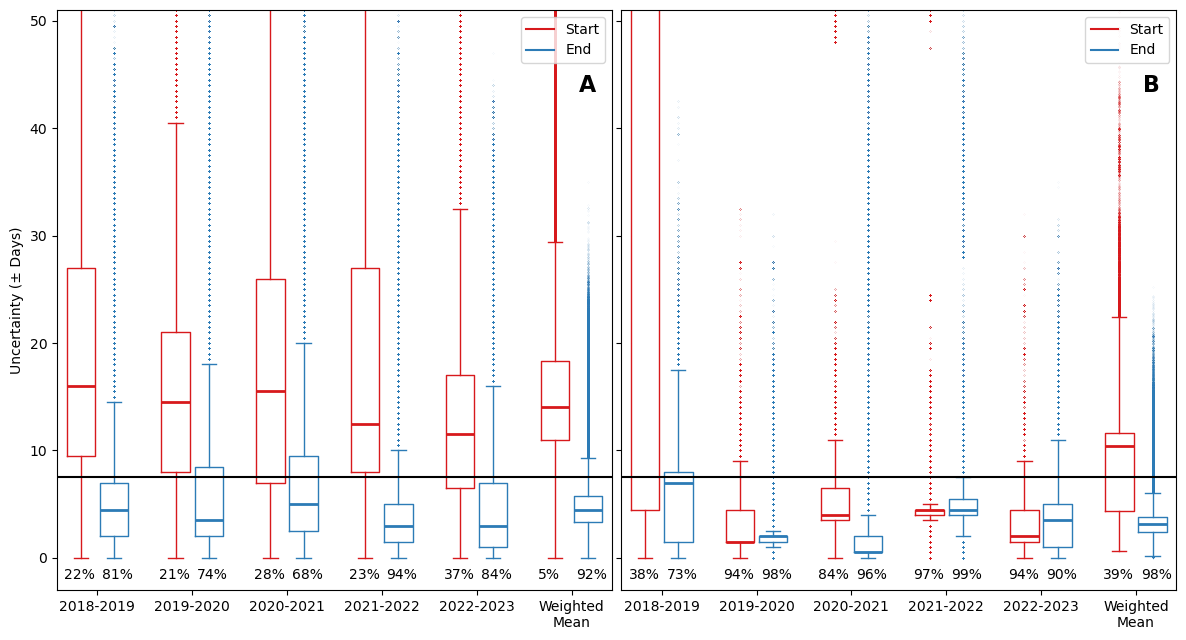

In [36]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6.5))

ticks = ['2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023', 'Weighted\nMean']

def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color = color_code)
         
    plt.plot([], c = color_code, label = label)
    plt.legend(loc = 'upper right')

# HBL Uncertainty plot
plt.sca(ax0)
ax0.text(0.94, 0.87, 'A', fontsize = 16, weight = 'bold', transform = ax0.transAxes, va = 'center')

start_u_plot_hbl = plt.boxplot(start_u_ar_hbl, positions = np.array(np.arange(len(start_u_ar_hbl))) * 2 - 0.35, widths = 0.6, 
                           medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#D7191C'))
end_u_plot_hbl = plt.boxplot(end_u_ar_hbl, positions = np.array(np.arange(len(end_u_ar_hbl))) * 2 + 0.35, widths = 0.6, 
                         medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#2C7BB6'))

define_box_properties(start_u_plot_hbl, '#D7191C', 'Start')
define_box_properties(end_u_plot_hbl, '#2C7BB6', 'End')

plt.axhline(y = 7.5, color = 'black')

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)

plt.ylim(-3, 51)

plt.ylabel('Uncertainty (± Days)')

for i in range(6):
    plt.annotate(start_good_hbl[i], xy = (i * 2 - 0.7, -2))
    plt.annotate(end_good_hbl[i], xy = (i * 2 + 0.1, -2))

# NA Uncertainty plot
plt.sca(ax1)
ax1.text(0.94, 0.87, 'B', fontsize = 16, weight = 'bold', transform = ax1.transAxes, va = 'center')

start_u_plot_na = plt.boxplot(start_u_ar_na, positions = np.array(np.arange(len(start_u_ar_na))) * 2 - 0.35, widths = 0.6, 
                           medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#D7191C'))
end_u_plot_na = plt.boxplot(end_u_ar_na, positions = np.array(np.arange(len(end_u_ar_na))) * 2 + 0.35, widths = 0.6, 
                         medianprops = dict(linewidth = 2), flierprops = dict(marker = '.', markersize = 0.05, markeredgecolor = '#2C7BB6'))

define_box_properties(start_u_plot_na, '#D7191C', 'Start')
define_box_properties(end_u_plot_na, '#2C7BB6', 'End')

plt.axhline(y = 7.5, color = 'black')

plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks)
ax1.set_yticklabels([])

plt.ylim(-3, 51)

for i in range(6):
    plt.annotate(start_good_na[i], xy = (i * 2 - 0.7, -2))
    plt.annotate(end_good_na[i], xy = (i * 2 + 0.1, -2))

plt.tight_layout(h_pad = 0, w_pad = -0.1)

fig.get_figure().savefig('Figure X.tif', dpi = 600, bbox_inches = 'tight', pil_kwargs = {'compression': 'tiff_lzw'})